In [601]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [552]:
#https://www.kaggle.com/datasets/voltdata/capes-bolsas
data = pd.read_csv(r"C:\Users\laura\Downloads\capes_bolsas.csv", index_col = 0)

### Verificação e limpeza de dados:

In [553]:
data.info() #verificando informações gerais do dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136114 entries, 1 to 136114
Data columns (total 28 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Ano                                  136114 non-null  int64  
 1   UF                                   136114 non-null  object 
 2   Município                            136114 non-null  object 
 3   Região                               136114 non-null  object 
 4   Código Programa                      130415 non-null  object 
 5   Programa Fomento                     136114 non-null  object 
 6   IES                                  136113 non-null  object 
 7   Status Jurídico                      136114 non-null  object 
 8   Programa                             130415 non-null  object 
 9   Área Avaliação                       136114 non-null  object 
 10  Área Conhecimento                    136114 non-null  object 
 11  Grande Área  

In [554]:
data.isnull().sum() #verificandos colunas com informações nulas:

Ano                                         0
UF                                          0
Município                                   0
Região                                      0
Código Programa                          5699
Programa Fomento                            0
IES                                         1
Status Jurídico                             0
Programa                                 5699
Área Avaliação                              0
Área Conhecimento                           0
Grande Área                                 0
Codigo IES                             125450
Coordenador Geral IsF                   75191
Coordenador Pedagógico IsF              75191
DOUTORADO PLENO                             0
Iniciação Científica                    75191
JOVENS TALENTOS - A                    125450
JOVENS TALENTOS - B                    125450
MESTRADO                                    0
MESTRADO PROFISSIONAL                   59026
PESQUISADOR VISITANTE ESPECIAL    

In [555]:
data.shape #verificando quantidade de linhas e colunas no dataframe

(136114, 28)

In [556]:
data.dropna(inplace=True) #removendos todas as informações nulas do dataframe (há outras tratativas que podem ser feitas, mas para fim didáticos, iremos remover info nulas)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9829 entries, 5 to 10664
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Ano                                  9829 non-null   int64  
 1   UF                                   9829 non-null   object 
 2   Município                            9829 non-null   object 
 3   Região                               9829 non-null   object 
 4   Código Programa                      9829 non-null   object 
 5   Programa Fomento                     9829 non-null   object 
 6   IES                                  9829 non-null   object 
 7   Status Jurídico                      9829 non-null   object 
 8   Programa                             9829 non-null   object 
 9   Área Avaliação                       9829 non-null   object 
 10  Área Conhecimento                    9829 non-null   object 
 11  Grande Área                  

In [557]:
data.drop(['PROFESSOR VISITANTE EXTERIOR PLENO', 'PROFESSOR VISITANTE EXTERIOR SENIOR', 'PROF VISITANTE NACIONAL SÊNIOR','PESQUISADOR VISITANTE ESPECIAL','JOVENS TALENTOS - A', 'JOVENS TALENTOS - B','Coordenador Pedagógico IsF','Coordenador Geral IsF', 'Área Avaliação', 'Professor IsF', 'Codigo IES'], axis=1, inplace=True) #removendos as colunas que não iremos analisar
# data.columns = data.columns.str.replace(" ", "_") #substiruir os espaços vazios por "_"
data.head()

,Ano,UF,Município,Região,Código Programa,Programa Fomento,IES,Status Jurídico,Programa,Área Conhecimento,Grande Área,DOUTORADO PLENO,Iniciação Científica,MESTRADO,MESTRADO PROFISSIONAL,PÓS-DOUTORADO,Total Linha
5,2018,AC,RIO BRANCO,NORTE,11001011001P8,DS,UFAC,Federal,ECOLOGIA E MANEJO DE RECURSOS NATURAIS,ECOLOGIA,CIÊNCIAS BIOLÓGICAS,0,0.0,8,0.0,0.0,8
6,2018,AC,RIO BRANCO,NORTE,11001011001P8,PNPD,UFAC,Federal,ECOLOGIA E MANEJO DE RECURSOS NATURAIS,ECOLOGIA,CIÊNCIAS BIOLÓGICAS,0,0.0,0,0.0,1.0,1
7,2018,AC,RIO BRANCO,NORTE,11001011003P0,DS,UFAC,Federal,LETRAS- LINGUAGEM E IDENTIDADE,LETRAS,"LINGÜÍSTICA, LETRAS E ARTES",0,0.0,17,0.0,0.0,17
8,2018,AC,RIO BRANCO,NORTE,11001011003P0,PNPD,UFAC,Federal,LETRAS- LINGUAGEM E IDENTIDADE,LETRAS,"LINGÜÍSTICA, LETRAS E ARTES",0,0.0,0,0.0,1.0,1
9,2018,AC,RIO BRANCO,NORTE,11001011004P7,DS,UFAC,Federal,PRODUÇÃO VEGETAL,AGRONOMIA,CIÊNCIAS AGRÁRIAS,18,0.0,9,0.0,0.0,27


### Analisando os dados:

##### 1) Analisando as bolsas concedidas:

In [580]:
#Por IES:

dados_IES = data.loc(axis=1)[['IES', 'Total Linha']] #criado um df apenas com as colunas 'Grande Área' e 'Iniciação Científica'
dados_IES_1 = dados_IES.groupby('IES').sum('Total Linha') #agrupando as informações por Área de Conhecimento 
dados_IES_1.sort_values(by='Total Linha', ascending=False, inplace=True) #organizando por ordem decrescente em Total Linha
dados_IES_1.head()

,Total Linha
IES,
USP,5169
UFRJ,3479
UFRGS,3330
UFMG,3085
UFSC,2838


Text(0.5, 0, 'Qnt de bolsas')

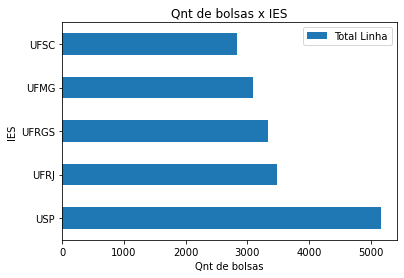

In [574]:
grafico_dados_IES = dados_IES_1.head().plot(kind="barh")
grafico_dados_IES.set_title('Qnt de bolsas x IES')
grafico_dados_IES.set_ylabel('IES')
grafico_dados_IES.set_xlabel('Qnt de bolsas')

In [581]:
#Por Grande Área:

dados_Area = data.loc(axis=1)[['Grande Área', 'Total Linha']] #filtrando pelas colunas desejadas
dados_Area_1 = dados_Area.groupby('Grande Área').sum('Total Linha') #agrupando por Grande Área e somando por Total Linha
dados_Area_1.sort_values(by='Total Linha', ascending=False, inplace=True) #organizando por ordem decrescente em Total Linha
dados_Area_1.head()

,Total Linha
Grande Área,
CIÊNCIAS HUMANAS,13772
CIÊNCIAS DA SAÚDE,13430
CIÊNCIAS AGRÁRIAS,13079
CIÊNCIAS EXATAS E DA TERRA,10640
ENGENHARIAS,10327


Text(0.5, 0, 'Qnt de bolsas')

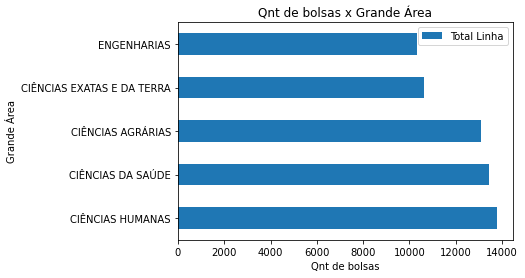

In [576]:
grafico_dados_area = dados_Area_1.head().plot(kind="barh")
grafico_dados_area.set_title('Qnt de bolsas x Grande Área')
grafico_dados_area.set_ylabel('Grande Área')
grafico_dados_area.set_xlabel('Qnt de bolsas')

In [577]:
#Por Área de Conhecimento:

dados_area_conhecimento = data.loc(axis=1)[['Área Conhecimento', 'Total Linha']]  #filtrando pelas colunas desejadas
dados_area_conhecimento_1 = dados_area_conhecimento.groupby('Área Conhecimento').sum('Total Linha') #agrupando por Área Conhecimento e somando por Total Linha
dados_area_conhecimento_1.sort_values(by='Total Linha', ascending=False, inplace=True) #organizando por ordem decrescente em Total Linha
dados_area_conhecimento_1.head()

,Total Linha
Área Conhecimento,
AGRONOMIA,5652
MEDICINA,5228
INTERDISCIPLINAR,4091
EDUCAÇÃO,3295
QUÍMICA,3113


#### 2) Analisando bolsas de IC concedidas:

In [599]:
#Por Grande Área:

data_area_IC = data.loc(axis=1)[['Grande Área', 'Iniciação Científica']] #filtrando pelas colunas desejadas
data_area_IC_1 = data_area_IC.groupby('Grande Área').sum('Iniciação Científica') #agrupando por Grande Área e somando por Inciciação Científica
data_area_IC_1.sort_values(by='Iniciação Científica', ascending=False, inplace=True) #organizando por ordem decrescente em Iniciação Científica
data_area_IC_1.head() 

,Iniciação Científica
Grande Área,
CIÊNCIAS BIOLÓGICAS,166.0
CIÊNCIAS EXATAS E DA TERRA,108.0
CIÊNCIAS HUMANAS,82.0
CIÊNCIAS AGRÁRIAS,66.0
ENGENHARIAS,54.0


Text(0.5, 0, 'Qnt de bolsas de IC')

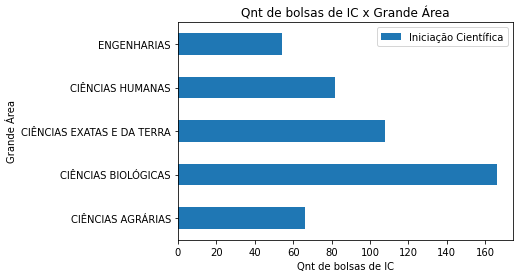

In [600]:
grafico_data_area_IC = data_area_IC_1.head().groupby('Grande Área').sum('Iniciação Científica').plot(kind='barh')
grafico_data_area_IC.set_title('Qnt de bolsas de IC x Grande Área')
grafico_data_area_IC.set_ylabel('Grande Área')
grafico_data_area_IC.set_xlabel('Qnt de bolsas de IC')

In [591]:
#Por Área de Conhecimento:
data_area_esp_IC = data.loc(axis=1)[['Área Conhecimento', 'Iniciação Científica']] #filtrando pelas colunas desejadas
data_area_esp_IC_1 = data_area_esp_IC.groupby('Área Conhecimento').sum('Iniciação Científica') #agrupando por Área Conhecimento e somando por Inciciação Científica
data_area_esp_IC_1.sort_values(by='Iniciação Científica', ascending=False, inplace=True) #organizando por ordem decrescente em Iniciação Científica
data_area_esp_IC_1.head()

,Iniciação Científica
Área Conhecimento,
ECOLOGIA,48.0
PARASITOLOGIA,38.0
FÍSICA,36.0
AGRONOMIA,32.0
GEOCIÊNCIAS,26.0


Text(0.5, 0, 'Qnt de bolsas de IC')

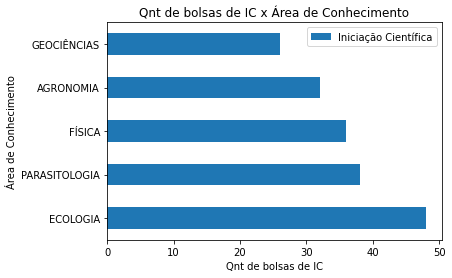

In [593]:
grafic_area_esp_IC = data_area_esp_IC_1.head().plot(kind='barh')
grafic_area_esp_IC.set_title('Qnt de bolsas de IC x Área de Conhecimento')
grafic_area_esp_IC.set_ylabel('Área de Conhecimento')
grafic_area_esp_IC.set_xlabel('Qnt de bolsas de IC')

In [607]:
correlacao = data.drop(['Ano'], axis=1).corr() #verificando co-relação entre as variáveis
correlacao

,DOUTORADO PLENO,Iniciação Científica,MESTRADO,MESTRADO PROFISSIONAL,PÓS-DOUTORADO,Total Linha
DOUTORADO PLENO,1.000000,-0.036757,0.696313,-0.007404,-0.239698,0.937057
Iniciação Científica,-0.036757,1.000000,-0.053392,-0.001685,0.021946,-0.007002
MESTRADO,0.696313,-0.053392,1.000000,-0.009390,-0.307744,0.894522
MESTRADO PROFISSIONAL,-0.007404,-0.001685,-0.009390,1.000000,0.110330,0.012615
PÓS-DOUTORADO,-0.239698,0.021946,-0.307744,0.110330,1.000000,-0.214852
Total Linha,0.937057,-0.007002,0.894522,0.012615,-0.214852,1.000000


<AxesSubplot:>

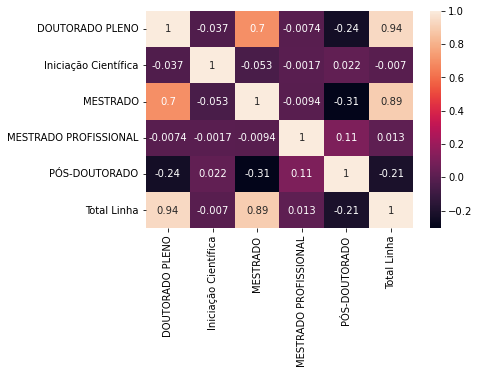

In [614]:
sns.heatmap(data.drop(['Ano'], axis=1).corr(), xticklabels=correlacao.columns, yticklabels=correlacao.columns, annot=True)